In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [10]:
df = pd.read_csv('data.csv')
df = df.drop(["id", "Unnamed: 32"], axis=1)
x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']  # Target variable

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=51)

In [11]:
# Create a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(x_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test_scaled)

In [12]:
# Model evaluation
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9736842105263158
Confusion Matrix:
[[75  1]
 [ 2 36]]
Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        76
           M       0.97      0.95      0.96        38

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [13]:
# Scale data 0-1
x_train_scaled = StandardScaler().fit_transform(x_train)
x_test_scaled = StandardScaler().fit_transform(x_test)

# Create a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(x_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test_scaled)

In [14]:
# Model evaluation
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9736842105263158
Confusion Matrix:
[[75  1]
 [ 2 36]]
Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        76
           M       0.97      0.95      0.96        38

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



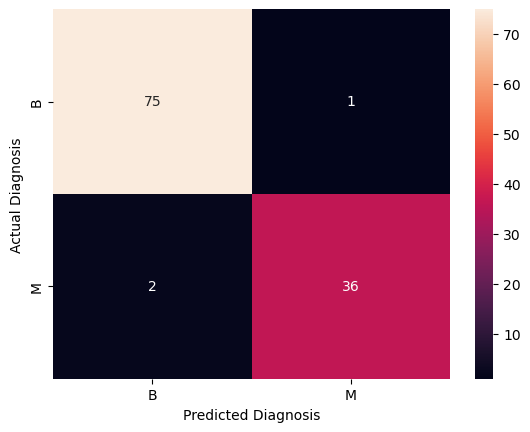

In [4]:
# Confusion matrix
label_mapping = {0: 'B', 1: 'M'}
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Predicted Diagnosis')
plt.ylabel('Actual Diagnosis')
plt.show()

In [5]:
def accuracy_info(y_test, y_pred):
    # Model evaluation
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n{conf_matrix}')

    # Classification Report
    class_report = classification_report(y_test, y_pred)
    print(f'Classification Report:\n{class_report}')

In [6]:
# Create a RandomForestClassifier
model = RandomForestClassifier(n_estimators=500, random_state=42)

# Fit the model to the training data
model.fit(x_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test_scaled)

accuracy_info(y_test, y_pred)

Accuracy: 0.9649122807017544
Confusion Matrix:
[[74  2]
 [ 2 36]]
Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        76
           M       0.95      0.95      0.95        38

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [7]:
# Create a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42, criterion="entropy")

# Fit the model to the training data
model.fit(x_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test_scaled)

accuracy_info(y_test, y_pred)

Accuracy: 0.956140350877193
Confusion Matrix:
[[74  2]
 [ 3 35]]
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.97      0.97        76
           M       0.95      0.92      0.93        38

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [8]:
from xgboost import XGBRFClassifier
model = XGBRFClassifier(n_estimators=100)

x = df.drop(['diagnosis'], axis=1)
df.diagnosis = [1 if each == "M" else 0 for each in df.diagnosis]
y = df['diagnosis']  # Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=51)
# Scale data 0-1
x_train_scaled = StandardScaler().fit_transform(x_train)
x_test_scaled = StandardScaler().fit_transform(x_test)

# Fit the model to the training data
model.fit(x_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test_scaled)

accuracy_info(y_test, y_pred)

Accuracy: 0.956140350877193
Confusion Matrix:
[[73  3]
 [ 2 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        76
           1       0.92      0.95      0.94        38

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [9]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(n_estimators=100)
# Fit the model to the training data
model.fit(x_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test_scaled)

accuracy_info(y_test, y_pred)

[LightGBM] [Info] Number of positive: 174, number of negative: 281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4541
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382418 -> initscore=-0.479299
[LightGBM] [Info] Start training from score -0.479299
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in